In [1]:
# Importamos librerias
from sklearn.model_selection import train_test_split

#Librerias modelo arboles de decision
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Librerias KNN (Al final utilizo este modelo para aplicarlo al ejercicio y compararlo con el arbol de decision)
from sklearn.neighbors import KNeighborsClassifier

#Metricas
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importamos datos
data = pd.read_csv("date_fruits.csv")
df_fruits = pd.DataFrame(data)
df_fruits.head()

area  perimeter  major_axis  minor_axis  eccentricity   eqdiasq  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   solidity  convex_area  extent  aspect_ratio  roundness  compactness target  
0    0.9947       424428  0.7831        1.2976     0.9374       0.8750  BERHI  
1    0.9974       339014  0.7795        1.2161     0.9773       0.9065  BERHI  
2    0.9962       528876  0.7657        1.3150     0.9446       0.8706  BERHI  
3    0.9948       418255  0.7759        1.2831     0.9458       0.8791  BERHI  
4    0.9908       350797  0.7569        1.3108     0.9358       0.8707  BERHI

In [3]:
df_fruits.shape

(898, 13)

In [4]:
# Mostamos por pantalla cuantos valores hay de cada tipo de la variable objetivo.
df_fruits["target"].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: target, dtype: int64

Como podemos observar el tipo de datil DOKOL es el que más veces aparece con un total de 204 registros en el dataset mientras que el tipo BERHI solo cuenta con un total de 65 registros. A la hora de predecir el resultado esto va a influir por que al tener más registros va a ser más facil poder indentificarlos a futuro. 

# Arboles de decision (Clasificacion)

## Procesamiento de los datos

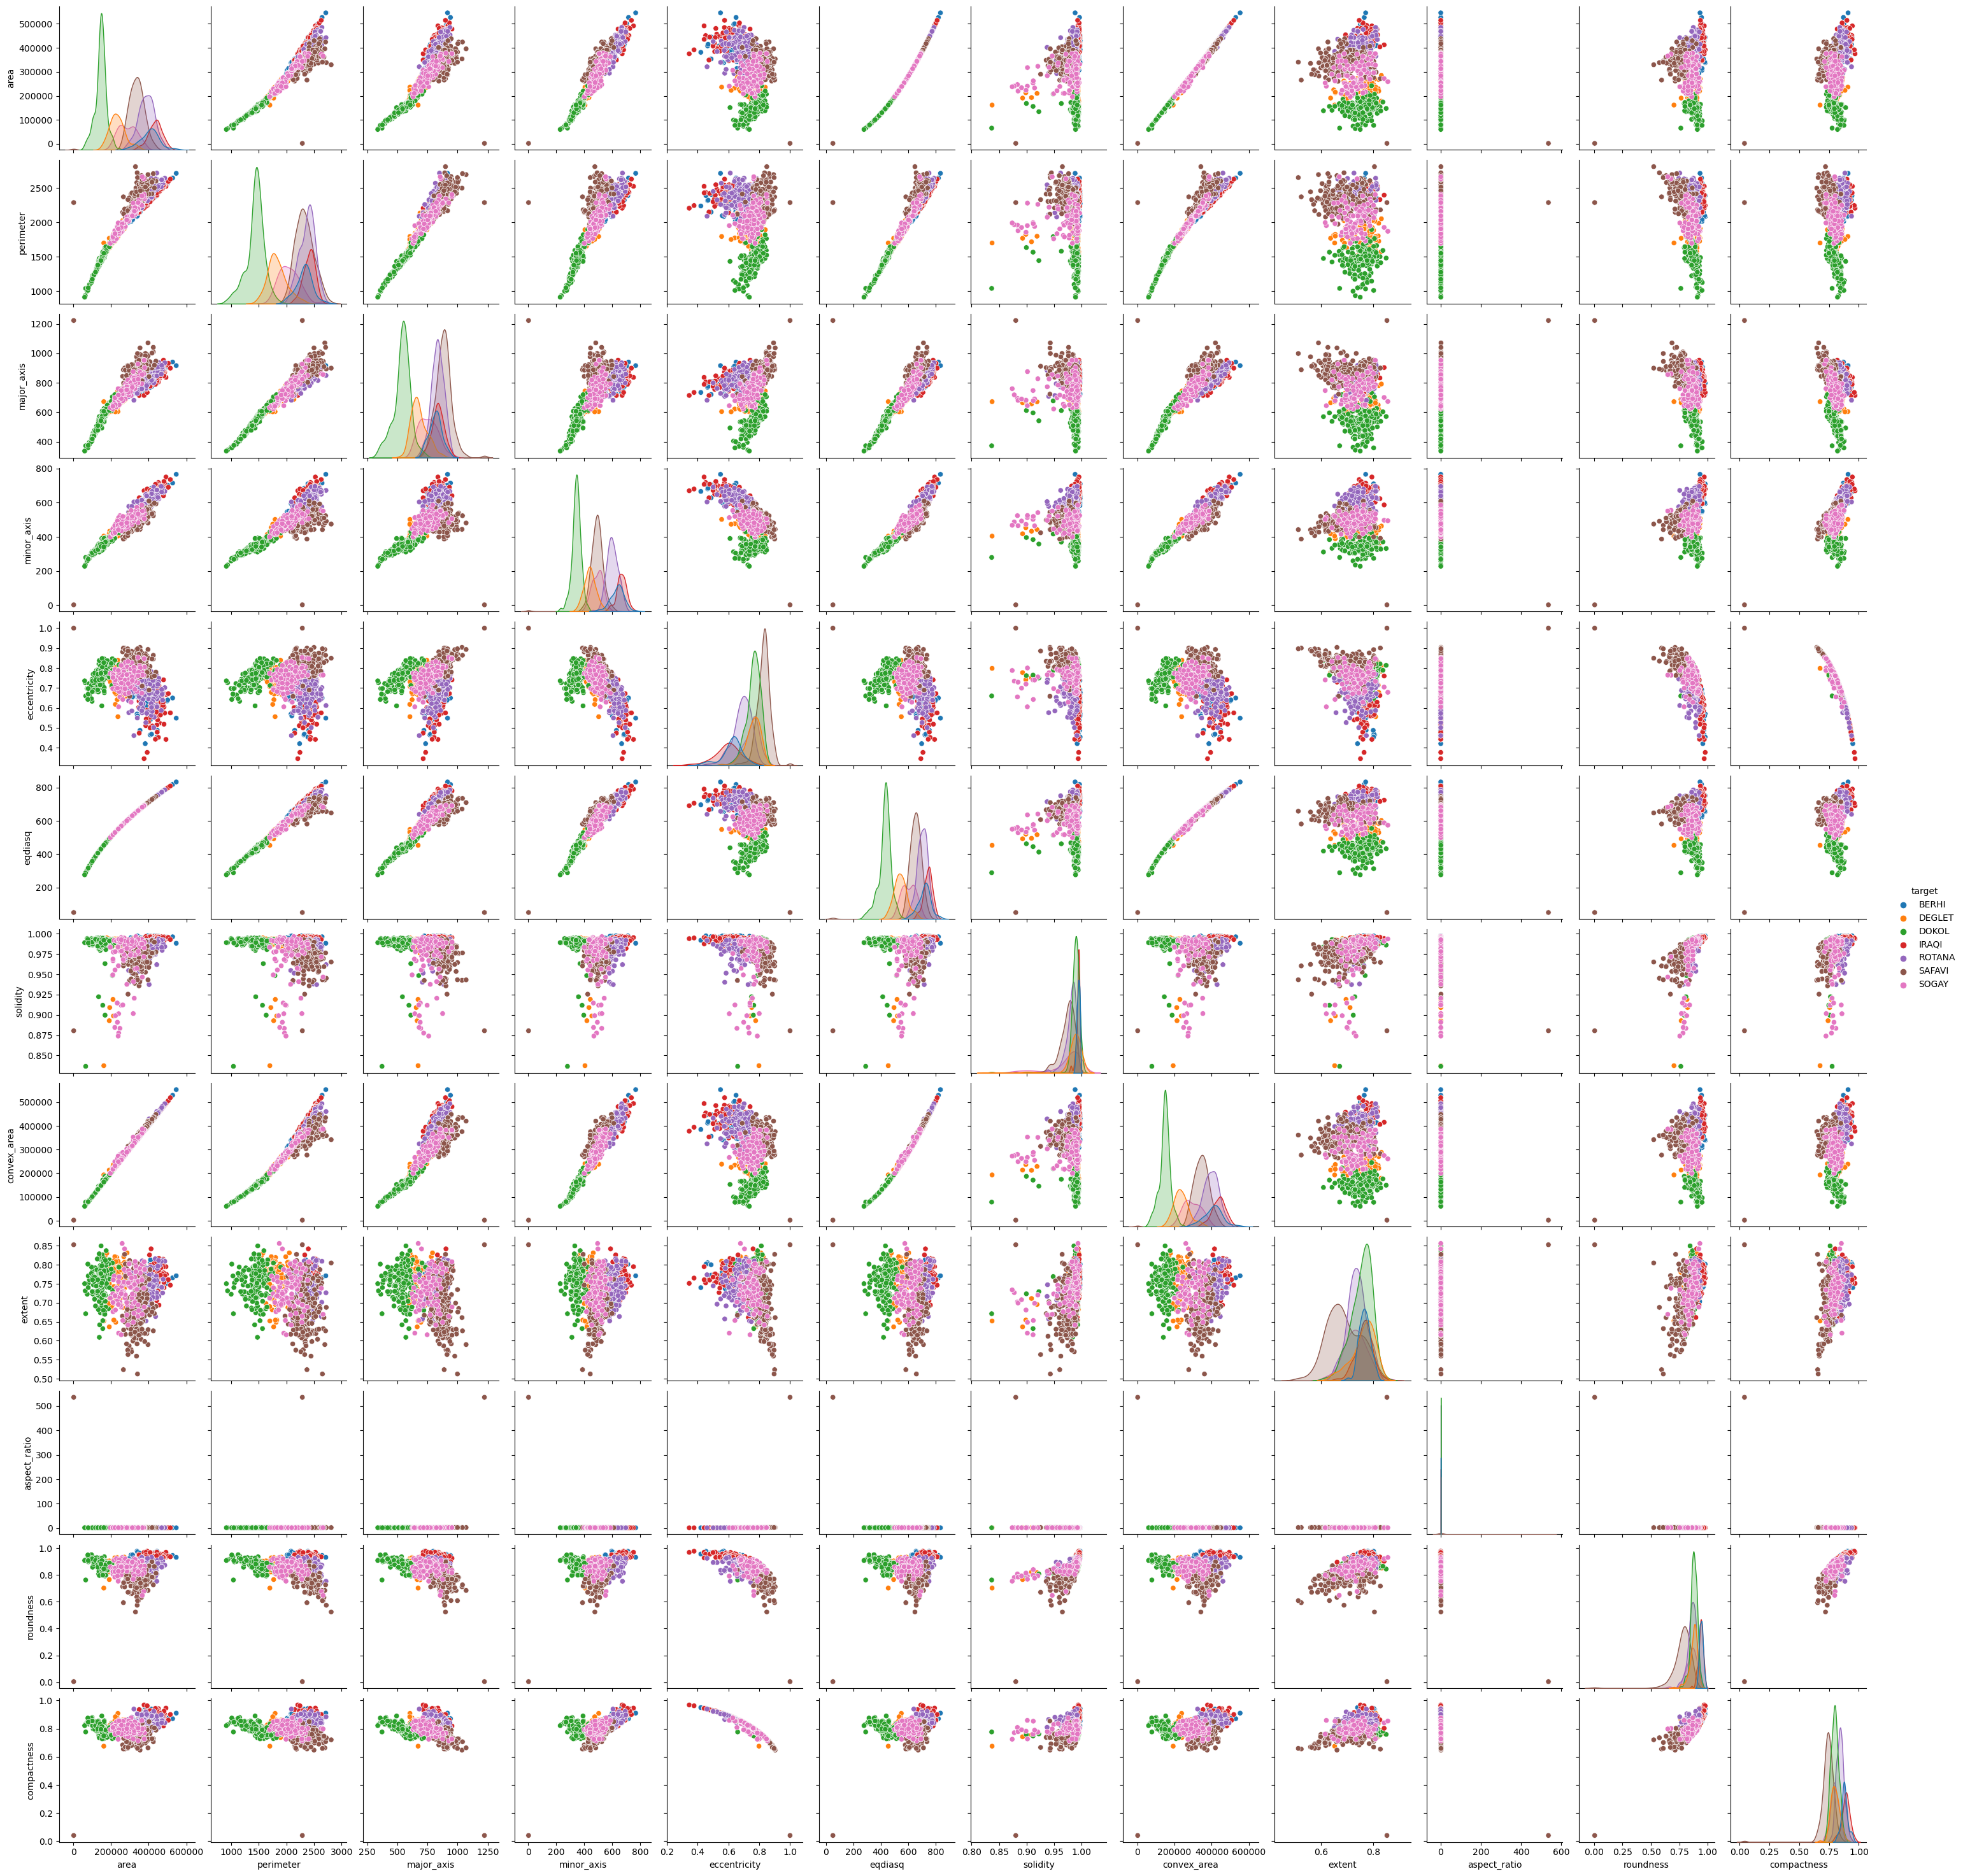

In [7]:
# Vamos a crear un gráfico pairplot para ver como influyen las diferentes etiquetas en la etiqueta objetivo.
sns.pairplot(df_fruits, hue="target")

In [25]:
x = df_fruits[["perimeter", "major_axis", "minor_axis", "eqdiasq","convex_area", "compactness",]]
y = df_fruits["target"]

En la variable 'x' he seleccionado estas columnas por que tras varias pruebas son las que mejor precisión me han dado a la hora de predecir futuros resultados.

In [9]:
# Division de los datos
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [30]:
# Creacion del modelo de clasificacion
clf = DecisionTreeClassifier(max_depth=7, random_state=1)

# Entrenamos el modelo de clasificación
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

Seleccionamos una profundidad del árbol igual a 7 por que tras varias pruebas es la que mejor resutlado me ha dado, siendo la profunidad maxima que puede tener el árbol de decision.

In [11]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,20), dpi=600)
tree.plot_tree(clf,filled=True, ax=axes)
plt.savefig('arbol.png')

# Pinto el arbol de esta manera por que como es tan grande, no se vee correctamente en el notebook.
# Por ello lo guardo como una imagen en el PC para poder verlo correctamente.

In [31]:
# Valicacion de resultados
y_pred = clf.predict(x_val)

#### Metricas del conjunto de validacion

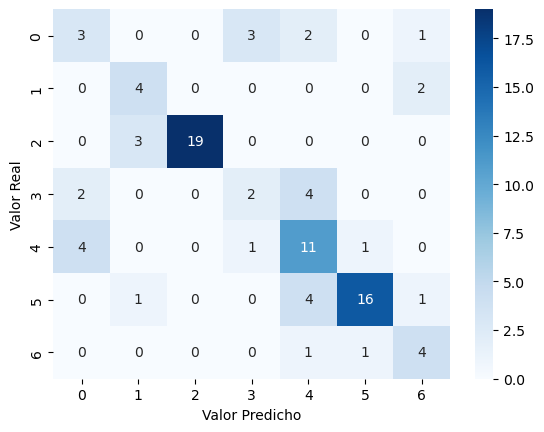

In [32]:
# Creamos una matriz de confusion y la mostramos en un grafico de tipo heatmap.
c_matrix = confusion_matrix(y_val, y_pred)

fig1 = sns.heatmap(c_matrix, cmap="Blues", annot=True)
fig1.set_xlabel("Valor Predicho")
fig1.set_ylabel("Valor Real")

plt.show()

In [33]:
# Mostramos el reporte de clasificación.
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       BERHI       0.33      0.33      0.33         9
      DEGLET       0.50      0.67      0.57         6
       DOKOL       1.00      0.86      0.93        22
       IRAQI       0.33      0.25      0.29         8
      ROTANA       0.50      0.65      0.56        17
      SAFAVI       0.89      0.73      0.80        22
       SOGAY       0.50      0.67      0.57         6

    accuracy                           0.66        90
   macro avg       0.58      0.59      0.58        90
weighted avg       0.69      0.66      0.66        90



Utilizando el conjunto de datos de validación solo obtenemos una precisión total del 66% de nuestro modelo. Como podemos observar los tipos BERHI e IRAQI son los que menos precisión obtienen, esto coincide con que son los que menos registros presentan en nuestro dataset.

In [34]:
# Prediccion de resultados futuros
y_pred = clf.predict(x_test)

#### Metricas del conjunto de testeo

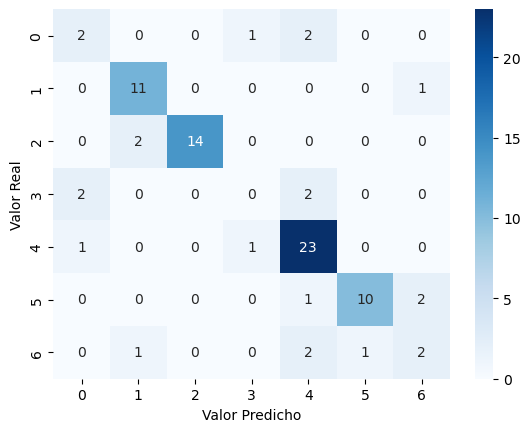

In [35]:
# Creamos una matriz de confusion y la mostramos en un grafico de tipo heatmap.
c_matrix = confusion_matrix(y_test, y_pred)

fig2 = sns.heatmap(c_matrix, cmap="Blues", annot=True)
fig2.set_xlabel("Valor Predicho")
fig2.set_ylabel("Valor Real")

plt.show()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       BERHI       0.40      0.40      0.40         5
      DEGLET       0.79      0.92      0.85        12
       DOKOL       1.00      0.88      0.93        16
       IRAQI       0.00      0.00      0.00         4
      ROTANA       0.77      0.92      0.84        25
      SAFAVI       0.91      0.77      0.83        13
       SOGAY       0.40      0.33      0.36         6

    accuracy                           0.77        81
   macro avg       0.61      0.60      0.60        81
weighted avg       0.75      0.77      0.75        81



### Conclusiones aplicando el arbol de decision

 Utilizando arboles de decision con el modelo de clasificacion he conseguido llegar a un maximo de acierto del 77%.
 Para ello las variables que mejor resultado me han dado son las que he usado en la X. Tanto si añadía alguna variable más como
 si intentaba eliminar, la precisión era inferior. La profunidad del arbol igual a 7 es la que mejor resultado me ha llegado a     dar.
  Como aparece en el reporte superior, la clasificacion de la clase IRAQI es desfavorable con un 0% de acierto. De la misma
  manera la clase SOGAY y la clase BERHI dan unos resultados muy bajos. Como ya comenté al principio, esto se debe a que cuanto menor sea el número de registros de una clase menos precisos van a ser los resultados de nuestro modelo.

# Prueba del ejercicio con el modelo KNN

Vamos a predecir este mismo dataset con el modelo de KNN y comparar cual de los dos modelos obtiene una mejor precisión en la predicción de los resultados. Para ello vamos a utilizar las mismas variables de entrenamiento y testeo que hemos utilizado anteriormente, así nos aseguramos que los registros son los mismos en ambos modelos.


In [18]:
#Definimos la k (vecinos mas cernanos a elegir)
k = 5

# Creamos el modelo
knn_model = KNeighborsClassifier(n_neighbors=k)

# Ajustamos el modelo al conjunto de datos de entrenamiento
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

Le asignamos a la k un valor igual a 5 por que trás probar con diferentes numeros, el 5 es el que mejor precisión nos da a la hora de predecir los resultados.

### Validacion del conjunto

In [40]:
# Prediccion utilizando el conjunto de validación.
y_pred = knn_model.predict(x_val)

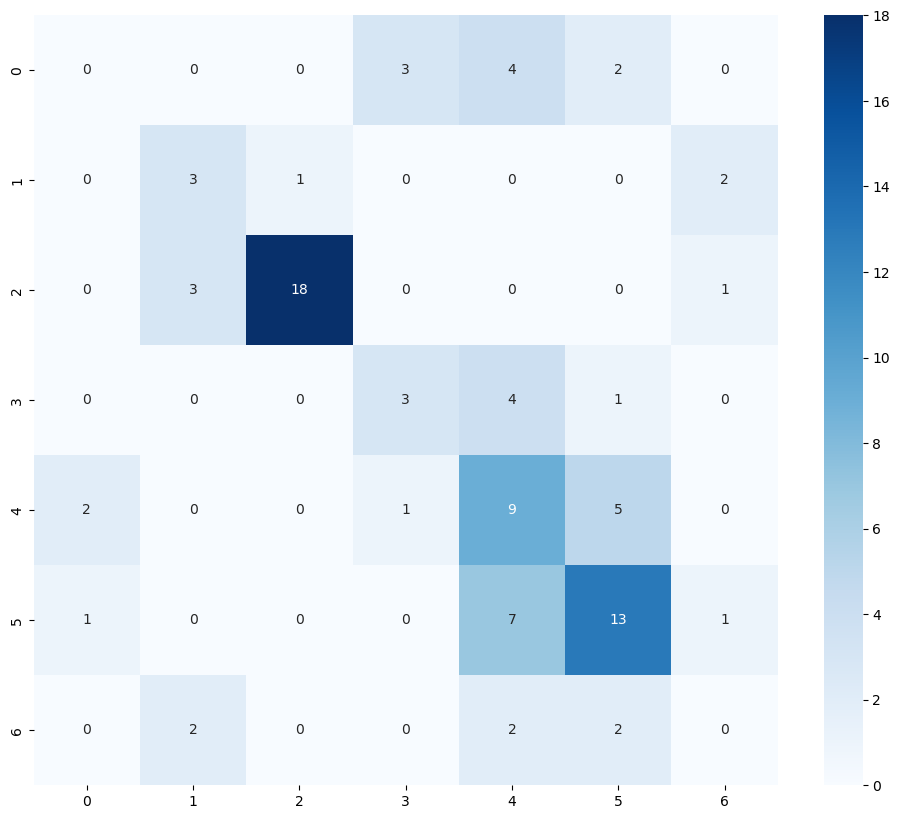

In [20]:
# Creamos una matriz de confusión y la mostramos en un gráfico.
cf_matrix = confusion_matrix(y_val, y_pred)

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cf_matrix, annot=True, cmap="Blues")

plt.show()

In [21]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00         9
      DEGLET       0.38      0.50      0.43         6
       DOKOL       0.95      0.82      0.88        22
       IRAQI       0.43      0.38      0.40         8
      ROTANA       0.35      0.53      0.42        17
      SAFAVI       0.57      0.59      0.58        22
       SOGAY       0.00      0.00      0.00         6

    accuracy                           0.51        90
   macro avg       0.38      0.40      0.39        90
weighted avg       0.50      0.51      0.50        90



Con nuestro conjunto de validación, la precisión de nuestro modelo es solo del 51%.

### Prediccion de resultados

In [22]:
# Predicción de futuros resultados
y_pred = knn_model.predict(x_test)

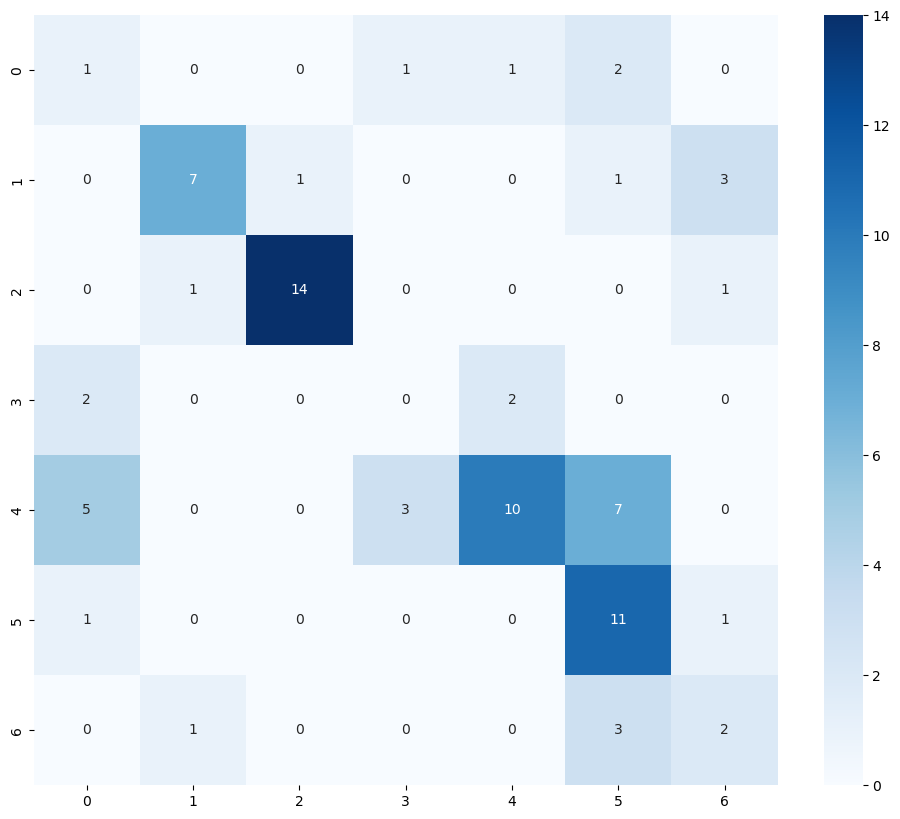

In [23]:
# Craemos una matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cf_matrix, annot=True, cmap="Blues")

plt.show()

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       BERHI       0.11      0.20      0.14         5
      DEGLET       0.78      0.58      0.67        12
       DOKOL       0.93      0.88      0.90        16
       IRAQI       0.00      0.00      0.00         4
      ROTANA       0.77      0.40      0.53        25
      SAFAVI       0.46      0.85      0.59        13
       SOGAY       0.29      0.33      0.31         6

    accuracy                           0.56        81
   macro avg       0.48      0.46      0.45        81
weighted avg       0.64      0.56      0.57        81



La precisión que nos ofrece el modelo KNN utilizando las mismas variables que en el modelo del arbol de decisión es mucho menor, dando un total de 56%.

## Conclusiones finales

Al utlizar el modelo KNN con las mismas variables que hemos utilizado en el arbol de decisiones, la efectividad es mucho menor.
He probado el modelo KNN en la variable X solo 2 etiquetas, que son las que mejor resultado me han dado, que han sido 'area' y 'convex_area' alzancando una precision máxima de un 66%.
 Podemos concluir que para este ejercicio es mejor utilizar el modelo de Arboles de decision por que los resultados que nos ofrece son mucho mas precisos.